# X ray tomography
### Objectives

#### determine all the parameters to perform an X ray tomography


In [1]:
# main parameters to define

## spatial resolution
## number of projection
## sample positionning
## Energy and / or  Voltage and current 
## acquisition time


##  Spatial resolution

Spatial resolution corresponds to about twice the pixel size of the sample. To choose this resolution, you need to have an idea of the size of the smallest objects you wish to observe. Once this size is known, we'll choose a pixel size equal to a 10th. 

Example: I want to observe objects measuring 100µm: the pixel size will be taken to be equal to 10µm.

In [1]:
# Enter the minimum object size to be displayed
size_of_objects_to_see = 200 # in microns


# calculate pixel size required and display
pixel_size = size_of_objects_to_see / 10
print('pixel_size = %0.2f µm' %pixel_size)

pixel_size = 20.00 µm


## SOD and SDD sample positioning

For a laboratory X ray source where the flux is diverging, positioning depends on the selected sample pixel size, the detector pixel size and the SOD (Source Object Distance) and SDD (Source Detector Distance) distance. There are two cases :

case 1 : SDD is fixed and thus SOD is adjusted according pixel size : Depending on the biggest size of the sample BSS the distance and the source to berylium window distance (SBD) given by the tube. This may have some consequence on the real pixel size on the sample 

case 2 : SDD can be changed in this case the sample is usually placed as close to the berylium window as possible. The SDD is adjusted to obtained to desired pixel size on sample providing it is possible. Since the setup usually has a maximum SDD value in some case the desired pixel value cannot be reached. 

For a synchrotron source with a parallel beam these parameters are not relevant

In [5]:
# detector pixel size
pixel_detector = 127 # in µm
Source_Detector_Distance = 610 # SDD in mm
Max_Source_Detector_Distance = 500 # MSDD in mm 
Biggest_Size_Sample = 20 # BSS in mm
Source_Berylium_Distance = 14 # SBD in mm

Source_Object_Distance = pixel_size * (Source_Detector_Distance/pixel_detector)

if (Source_Object_Distance < Biggest_Size_Sample / 2  + Source_Berylium_Distance) :
    # SOD is set to BSS/2+SBD
    Source_Object_Distance = Biggest_Size_Sample / 2 + Source_Berylium_Distance
    print ('sample size induces a change in pixel size')
    print('SOD = %0.2f mm' %Source_Object_Distance)
    print('SDD = %0.2f mm' %Source_Detector_Distance)
    pixel_size = (Source_Object_Distance / Source_Detector_Distance) * pixel_detector
    print('pixel size = %0.2f µm' %pixel_size )
else :     
    Source_Object_Distance = pixel_size * (Source_Detector_Distance/pixel_detector)
    print('SOD = %0.2f mm' %Source_Object_Distance)
    print('SDD = %0.2f mm' %Source_Detector_Distance)
    print('pixel size = %0.2f µm' %pixel_size )

    
# case 2
# detector pixel size
pixel_detector = 127 # in µm
Biggest_Size_Sample = 20 # BSS in mm
Source_Berylium_Distance = 14 # SBD in mm
Max_Source_Detector_Distance = 500 # MSDD in mm

Source_Object_Distance = Biggest_Size_Sample / 2  + Source_Berylium_Distance
Source_Detector_Distance = Source_Object_Distance * pixel_detector / pixel_size

if (Source_Detector_Distance < Max_Source_Detector_Distance):
    print('SOD = %0.2f mm' %Source_Object_Distance)
    print('SDD = %0.2f mm' %Source_Detector_Distance)
    print('pixel size = %0.2f µm' %pixel_size )
else :     
    Source_Detector_Distance = Max_Source_Detector_Distance
    Source_Object_Distance = pixel_size * (Source_Detector_Distance/pixel_detector)
    pixel_size = (Source_Object_Distance / Source_Detector_Distance) * pixel_detector
    print('SOD = %0.2f mm' %Source_Object_Distance)
    print('SDD = %0.2f mm' %Source_Detector_Distance)
    print('pixel size = %0.2f µm' %pixel_size )

SOD = 96.06 mm
SDD = 610.00 mm
pixel size = 20.00 µm
SOD = 24.00 mm
SDD = 152.40 mm
pixel size = 20.00 µm


## Choice of energy

A transmission of between 15% and 80% is required for tomography. Transmission is calculated using Bert-Lambert's law and the following equation:

where mu is the linear attenuation coefficient in cm-1, which depends on energy and material, and t is the sample thickness in cm. The XrayDB database provides the value of mu.

In general, it is necessary to use at least one aluminum filter to cut off the very low energies (<10keV) that will be cut off by the material. The code below calculates the transmission in an energy range from 20keV to 100keV for a steel with 15% Ni and 15% Cr atomic composition with a size of 1mm 

<IPython.core.display.Javascript object>


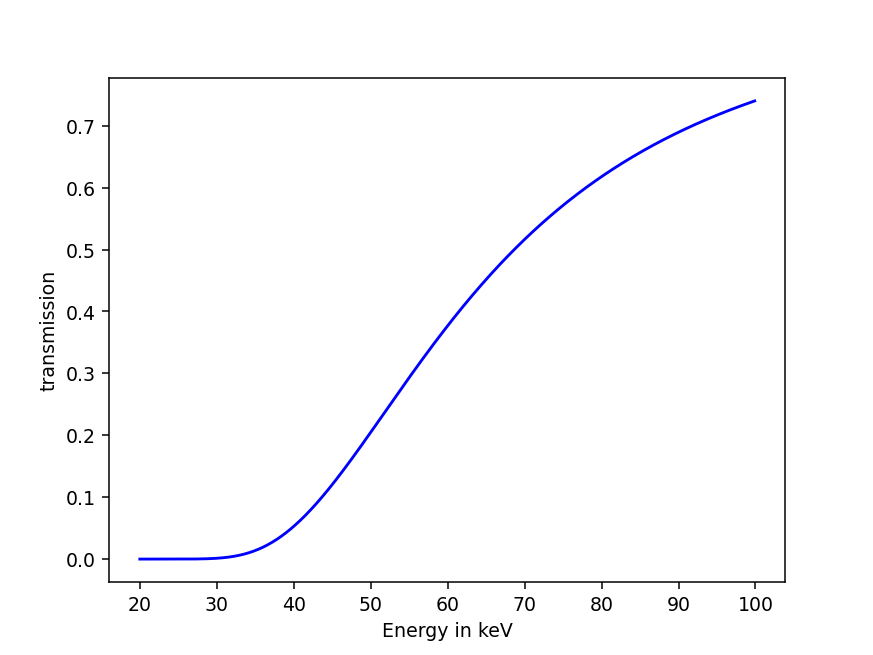

Energy in keV for 0.2 transmission = 49.70 keV
Energy in keV for 0.5 transmission = 68.70 keV


In [19]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import xraydb

# Material information
Material='Fe70Ni15Cr15' #chemical formula of Material
Density=8 # g/cm3
thickness=0.1 # in cm

# Energy range 20000 eV to 150000 eV with step of 1000 eV
Emin=20000.0
Emax=100000.0
Estep = 100.0
Energy_range=np.arange (Emin,Emax,Estep)

# get the linear attenuation coefficient for various energies from xraydb database
mu=xraydb.material_mu(Material,Energy_range,Density)

# compute the transmission
trans=np.exp(-mu*thickness)

# plot transmission coefficient vs energy
plt.figure(1)

plt.plot(Energy_range/1000,trans,'b-')   
plt.xlabel('Energy in keV')
plt.ylabel('transmission')

#find Energy for 20% transmission
transmission_value = 0.2
diff=np.absolute(trans-transmission_value)
index=diff.argmin()
Energy_value=Energy_range[index]/1000
print('Energy in keV for %0.1f transmission = %0.2f keV' %(transmission_value,Energy_value))

#find Energy for 50% transmission
transmission_value = 0.5
diff=np.absolute(trans-transmission_value)
index=diff.argmin()
Energy_value=Energy_range[index]/1000
print('Energy in keV for %0.1f transmission = %0.2f keV' %(transmission_value,Energy_value))



## Voltage and current selection for laboratory tomograph

A laboratory tomograph delivers a polychromatic spectrum: a tungsten filament is heated, then the extracted electrons are accelerated and sent to a W cathode at a voltage usually in kV. The spectrum will depend on the cathode material and the filter chosen (Al or Cu). For high energies (>50keV), a Cu filter of 0.5 mm thickness, for example, should be used. For lower energies, a 0.5-mm Al filter is preferable. The website below allows you to calculate the spectrum and evaluate the average energy, including the presence of the filter.

https://spekpy.smile.ki.se/

Effect of voltage: change 40kV to 230kV
Add a copper filter for 230kV

the current is given in mA s: note that tubes generally have limits on intensities depending on the voltage and the possibility of focusing on the target. Be sure to enter consistent values. 



## Choosing the number of projections

The number of projections mathematically required is equal to pi/2 multiplied by the number of detector columns. In practice, we use pi/4 multiplied by the number of detector columns. If the sample is more entirely in the field of view, pi/4 multiplied by the number of pixels in the sample (if well centered) can be used.

Note: if the sample is larger than the detector at the desired resolution, this is a local tomography. In this case, it is preferable to use a number of projections > pi/4, ideally pi/2.


In [23]:
import math 

# Valeur à définir
number_of_horizontal_pixel_on_detector = 2000
Biggest_Size_Sample = 100 # BSS in mm


nbpixel = Biggest_Size_Sample*1000 / pixel_size

print('number of pixel in the sample  : %d' %int(nbpixel))

if (nbpixel < number_of_horizontal_pixel_on_detector):
    print('standard tompgraphy : sample fully in the field of view')
    nbproj = math.ceil(0.75*nbpixel)    
    print('minimum number of projections : %0.0f ' %nbproj)
else:
    print('local tomography : sample larger than the field of view')
    ratio = nbpixel/number_of_horizontal_pixel_on_detector
    print('local tomography ratio %0.2f: ' %ratio )
    nbproj = math.ceil(0.75*number_of_horizontal_pixel_on_detector)
    print('minimum number of projections : %0.0f ' %nbproj)    

number of pixel in the sample  : 5000
local tomography : sample larger than the field of view
local tomography ratio 2.50: 
minimum number of projections : 1500 


## Choix du temps d'exposition

Le calcul fait ici est un ordre de grandeur : il se base sur le nombre moyen de photons transmis par l'échantillon compte tenu de l'absorption et sur la conversion du détecteur Varian. le temps d'exposition doit être choisi en fonction du nombre d'ADU sachant qu'en dessous de 5000 dans l'échantillon les images deviennent bruitées

In [13]:

Filter_Material = 'Al'
Filter_Thickness = 0.5 # in mm (put 0 if no filter)
Density_Filter= 2.7 # g/cm3

Material = 'Al'
Density_Material = 2.7 # g/cm3
Thickness_Material = 3 # in mm 

fps = 1 # frame per second
acc = 1 # nombre d'accumulation



# do not touch this part
Target_Material ='W'
theta = 22 # X ray beam angle / anode in °

ADU = fps * acc * (current/50) *4.4842*voltage**1.7813 # approximation from NOVISIM simulation
ADU = ADU * (610/SDD)**2

# compute ADU flat field with Filter
s0 = sp.Spek(kvp=voltage,th=theta,targ=Target_Material) # Create a spectrum
energy0, intensity0 = s0.get_spectrum(edges=True) # Get the spectrum
total0 = np.sum(energy0* intensity0)

s2 = sp.Spek(kvp=voltage,th=theta,targ=Target_Material) # Create a spectrum
myfilter=[(Filter_Material,Filter_Thickness), (Material,Thickness_Material)] # Filter the spectrum thickness in mm
s2.multi_filter(myfilter)
energy2, intensity2 = s2.get_spectrum(edges=True) # Get the spectrum
total2 = np.sum(energy2* intensity2)

ADU_Material = ADU*total2/total0
print('ADU in sample : %0.0f ' %ADU_Material)


ADU in sample : 14252 


In [45]:
print('résumé des paramètres de tomographie')

print('SOD = %0.2f cm' %SOD)
print('SDD = %0.2f cm' %SDD)

print('taille de pixel = %0.2f µm' %taille_de_pixel)

print('spotsize = %s' %spotsize)
print('Voltage = %0.1f kV' %voltage)
print('Current max = %0.1f µA' %current)

print('le nombre de projection minimal est : %0.0f ' %nbproj)
print('fps=%0.2f' %fps)
print('accumulation=%0.0f' %acc)

print('ADU in sample : %0.0f ' %ADU_Material)

résumé des paramètres de tomographie
SOD = 9.61 cm
SDD = 61.00 cm
taille de pixel = 21.00 µm
spotsize = small
Voltage = 60.0 kV
Current max = 164.3 µA
le nombre de projection minimal est : 736 
fps=1.00
accumulation=1
ADU in sample : 4454 
